### Код с урока

In [1]:
# The full neural network code!
###############################
import numpy as np

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print(train_images.shape)
print(train_labels.shape) 

(60000, 28, 28)
(60000,)


In [4]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [5]:
# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

In [6]:
# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [7]:
# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
)

Epoch 1/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.3530 - accuracy: 0.8937
Epoch 2/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.1791 - accuracy: 0.9454
Epoch 3/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.1391 - accuracy: 0.9575
Epoch 4/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.1185 - accuracy: 0.9628
Epoch 5/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.1060 - accuracy: 0.9670


In [8]:
# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

10000/10000 [==============================] - 0s 14us/step


[0.12183978099524975, 0.9632999897003174]

In [9]:
# Save the model to disk.
model.save_weights('model.h5')

In [10]:
# Load the model from disk later using:
# model.load_weights('model.h5')

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

[7 2 1 0 4]
[7 2 1 0 4]


### Анализ

Здесь мы можем менять следующие параметры:
* количество слоев
* количество нейронов в каждом слое
* функцию активации
* алгоритм для изменения весов
* количество эпох обучения

Реализуем функцию для автоматического создания, компиляции и обучения сети с возможностью замены упомянутых параметров

In [65]:
def create_nn(train_images, neurons_in_layer=[64, 64], activation='relu', optimizer='adam', n_epochs=5):
    
    model = Sequential([Dense(neurons_in_layer[0], activation=activation, input_shape=(784,))])
    if len(neurons_in_layer) > 1:
        for i in range(1, len(neurons_in_layer)):
            model.add(Dense(neurons_in_layer[i], activation=activation))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    model.fit(train_images, to_categorical(train_labels), epochs=n_epochs, batch_size=32, verbose=0)
    
    return model

In [80]:
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import time

In [87]:
def evaluate_and_plot_results(test_images, test_labels, train_images, params_list):
    for element in params_list:
        grid = ParameterGrid(element)
        accuracy_list = []
        time_list = []
        for param in grid:
            start = time.time()
            model = create_nn(train_images, **param)
            end = time.time()
            accuracy = model.evaluate(test_images, to_categorical(test_labels), verbose=0)[1]
            accuracy_list.append(accuracy)
            time_list.append(end - start)
        
        to_print_acc = [float('{:.3f}'.format(x)) for x in accuracy_list]
        to_print_time = [float('{:.3f}'.format(x)) for x in time_list]
        print(f'Значения точности: {to_print_acc}')
        print(f'Время обучения: {to_print_time}')
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        ax.bar([str(ele) for ele in list(element.values())[0]], accuracy_list)
        plt.grid(True)
        plt.ylim(0.85, 1)
        plt.xlabel(list(element.keys())[0])
        plt.ylabel('Точность')
        plt.show()

In [88]:
param_list = [{'neurons_in_layer': [[10], [200], [10, 10], [64, 64], [200, 75], [64, 64, 64], [350, 125, 50]]},
              {'activation': ['relu', 'sigmoid', 'elu', 'linear']},
              {'optimizer': ['adam', 'sgd', 'adamax', 'nadam']},
              {'n_epochs': [1, 2, 3, 5, 10, 20]}]

Значения точности: [0.913, 0.971, 0.902, 0.963, 0.961, 0.958, 0.97]
Время обучения: [5.9, 11.417, 6.694, 8.483, 12.228, 9.428, 26.824]


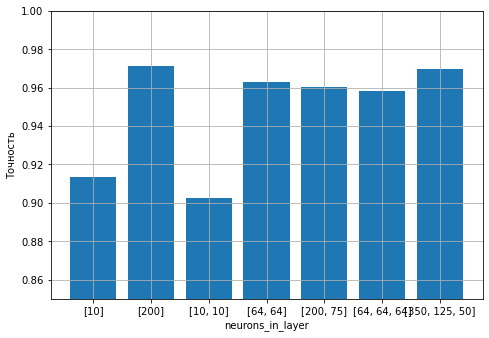

Значения точности: [0.968, 0.965, 0.971, 0.898]
Время обучения: [9.64, 9.58, 8.436, 8.181]


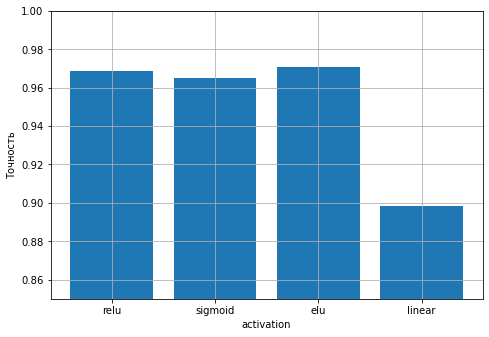

Значения точности: [0.964, 0.94, 0.964, 0.958]
Время обучения: [9.361, 7.08, 7.883, 9.267]


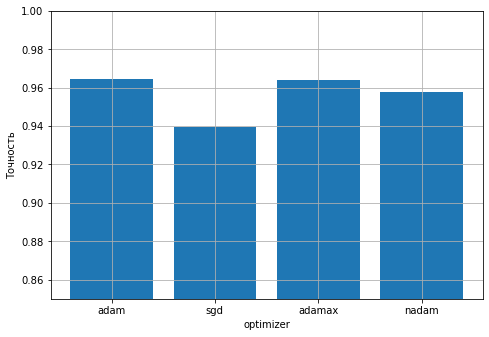

Значения точности: [0.935, 0.947, 0.959, 0.97, 0.972, 0.969]
Время обучения: [2.034, 3.703, 5.327, 8.781, 16.44, 33.331]


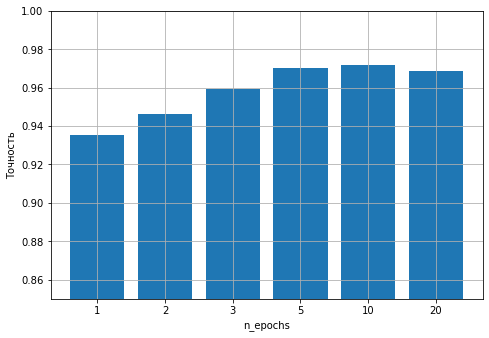

In [89]:
evaluate_and_plot_results(test_images, test_labels, train_images, param_list)

### Выводы

По первому графику:
* Увеличение нейронов в слое ведет к повышению точности нейросети
* Увеличение количества слоев так же повышает ее точность
* Нейросети со слоями в виде пирамиды (постепенно уменьшающимся количеством нейронов) показывают результаты лучше, при этом двухслойная сеть с такой структурой, работает лучше, чем трехслойная
* Лучшей оказалась нейросеть из одного скрытого слоя и 200 нейронами в нем

По второму:
* В данной задаче лучше других себя показывает функция активации elu, в то же время она быстрее по времени вычисления, чем выбранная изначально relu
* Используемая по умолчанию функция linear показала худшие результаты, но при этом эта функция активации самая быстрая по времени обучения

По третьему:
* В данной задаче лучше других себя показал алгоритм adam, выбранный изначально, в то же время он занимает больше вычислительных ресурсов

По четвертому:
* В графике прослеживается тренд: с увеличением количества эпох обучения увеличивается точность и время обучения

Общее:
* Увеличение сложности нейросети не всегда ощутимо повышает результат, а иногда даже снижает его
* Необходимо соблюдать баланс между сложностью модели и ее точностью, затраченные ресурсы не всегда могут оправдать доли процента выигранной точности